In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.datasets import load_iris

from dataclasses import dataclass

## Exercise 1: Implement K-means using numpy

In [2]:
@dataclass
class KMeans:
    k: int
    iterations: int
    tol: float
    
    def fit(self, x: np.ndarray) ->None:
        "Clustering the data"
        
        num_samples, _ = x.shape
        
        # initial centroid and their closets
        self.centroids = x[np.random.choice(num_samples, size=self.k, replace=False)]
        self.closet = np.zeros(num_samples)
        
        for _ in range(self.iterations):
            old_closet = self.closet.copy()  # current closet values
            # distance between sample to each centroid
            distances = [np.linalg.norm(self.centroids - feature, axis=1) for feature in x] # n_samples*k dim
            self.closet = np.argmin(distances, axis=1) # find the index of the closet centroid in k centroid, n_samples d
            
            # update the centroid
            for idx in range(self.k):
                self.centroids[idx] = (x[self.closet == idx]).mean(axis=0)
            
            # if distance between old closets and new closets < tol:
            if np.linalg.norm(self.closet - old_closet) < self.tol:
                break
#             if np.array_equal(self.closet, old_closet):
#                 break    

## Exercise 2: Apply kmeans on at least 3 toy dataset. Try different # clusters

In [17]:
iris = load_iris()

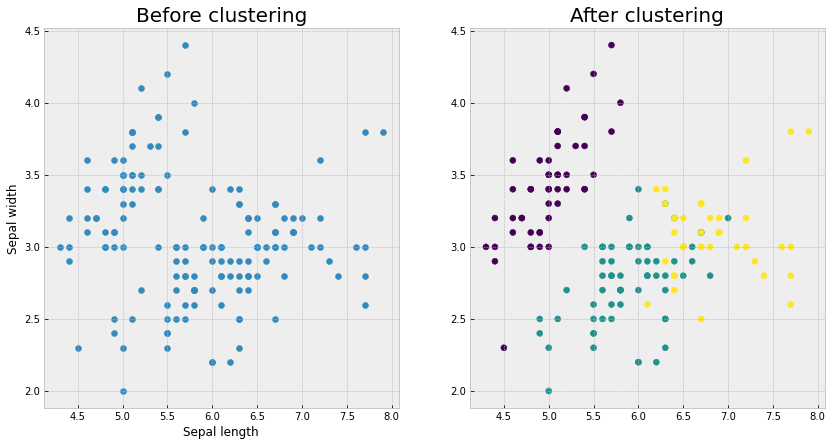

In [22]:
kmeans = KMeans(k=3, iterations=16, tol=1e-4)
kmeans.fit(iris.data)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
# fig.suptitle('Before and after clustering', fontsize=24)
axs[0].scatter(iris.data[:, 0], iris.data[:, 1])
axs[0].set_title('Before clustering', fontsize=20)
axs[0].set_xlabel('Sepal length')
axs[0].set_ylabel('Sepal width')
axs[1].scatter(iris.data[:, 0], iris.data[:, 1], c=kmeans.closet)
axs[1].set_title('After clustering', fontsize=20)

plt.show()

## Exercise 3

In [ ]:
x = iris.data
sum_of_squared_distances = []
k = range(1,10)
for num_clusters in k :
    kmeans = KMeans(k=num_clusters)
    kmeans.fit(x)
    sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(k,sum_of_squared_distances,’bx-’)
plt.xlabel(‘Values of K’) 
plt.ylabel(‘Sum of squared distances/Inertia’) 
plt.title(‘Elbow Method For Optimal k’)
plt.show()